# Lab 3 Goals

The goals of this lab are:

* To learn to address failed assumptions in multiple regression.
* To find significant predictors for a response variable in multiple regression.
* To learn to incorporate categorical variables in multiple regression. 
* To continue practicing multiple linear regression.
* To fit logistic regression.  

For this lab, it may be helpful to install and load the following modules: 

* `numpy`
* `pandas` 
* `plotnine`
* `statsmodels`

In [3]:
import numpy as np
import pandas as pd
import plotnine as p9
import statsmodels.api as sm

We will be using the AirBnB prices dataset from Homeworks 1 and 2. Refresh yourself on the variables it includes by reading the [Kaggle documentation](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities) as well as the [documentation from the original source, Zenodo.](https://zenodo.org/record/4446043#.ZCTMTezMK3J) Now that you know how it should be cleaned, you can download the full dataset from Canvas and upload it. 

In [4]:
AirBnB_prices = pd.read_csv("AirBnB_prices.csv")

## Addressing Assumptions

1. Refit a simple linear regression model predicting `realSum` from `price`, and make a note of the $r^2$ (which can be found in the `.summary()` output. 

In [5]:
X1 = AirBnB_prices["dist"]
X1 = sm.add_constant(X1)

Y = AirBnB_prices["realSum"]

model1 = sm.OLS(Y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realSum   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.56e-24
Time:                        14:22:34   Log-Likelihood:            -3.7285e+05
No. Observations:               51707   AIC:                         7.457e+05
Df Residuals:                   51705   BIC:                         7.457e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        299.4337      2.401    124.706      0.000     294.727     304.140
dist          -6.1273      0.602    -10.180      0.000      -7.307      -4.948
==============================================================================
Omnibus:                   117203.778   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1502538372.219
Skew:                          21.468   Prob(JB):                         0.00
Kurtosis:                     837.006   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\textcolor{blue}{The $r^2$ is 0.2\%, which is very low.}

2. Remake the diagnostic plots (a scatterplot of residuals against the predicted values, and a histogram of the residuals). Review why the linear model is not appropriate for this data. 

In [6]:
model1_df = model1.fittedvalues.to_frame(name = 'Fitted')
model1_df['Residuals'] = model1.resid

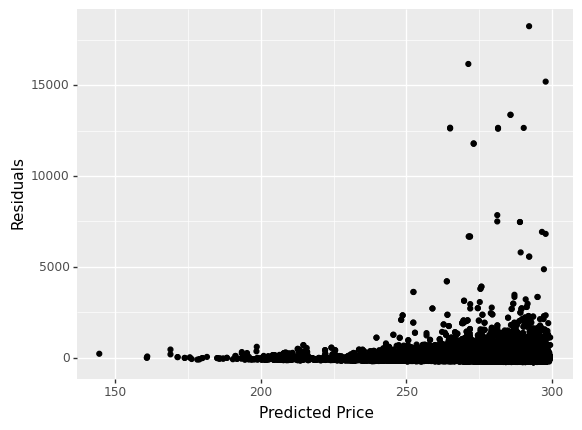

<ggplot: (391261805)>

In [7]:
(p9.ggplot(model1_df, p9.aes(x = 'Fitted', y = 'Residuals')) +
 p9.geom_point() +
 p9.xlab("Predicted Price") +
 p9.ylab("Residuals"))

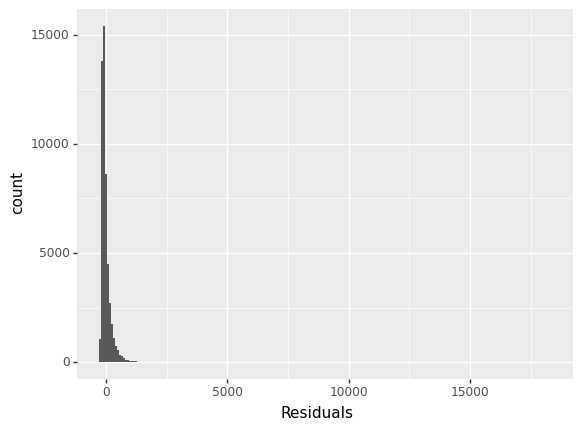

<ggplot: (391146641)>

In [8]:
(p9.ggplot(model1_df, p9.aes(x = 'Residuals')) +
   p9.geom_histogram(bins = 230) +
   p9.xlab("Residuals"))

\textcolor{blue}{The variance of the residuals is not constant, and the residuals are extremely right skewed, violating the assumptions of constant variance and symmetric, unimodal (normal) residuals. This is partially due to the extreme values in the response variable.}

3. Sometimes when the response variable is particularly skewed, we can easily address failed assumptions by applying a mathematical transformation to the different variables. You may remember from Homework 2 that the price per night of the AirBnBs has a few very extreme values--specifically, an \euro 18,54545 per night one bedroom home in Athens. Apply the log (base $e$) transformation to `realSum`, and save the transformed values as a new column in your dataframe (name it `logRealSum`). Plot the distribution of the transformed variable and re-examine the histogram.

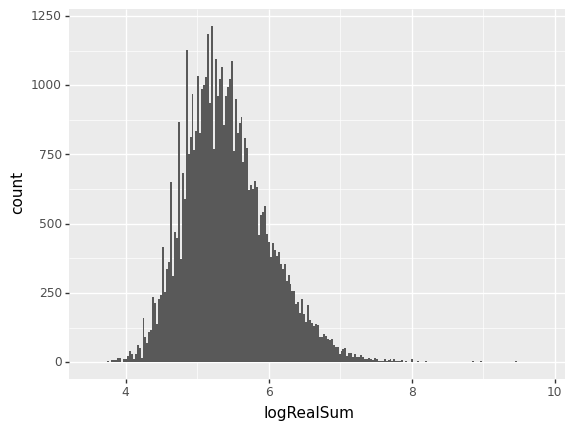

<ggplot: (391261829)>

In [9]:
AirBnB_prices['logRealSum'] = np.log(AirBnB_prices['realSum'])

(p9.ggplot(AirBnB_prices, p9.aes(x = 'logRealSum')) +
  p9.geom_histogram(bins = 230))

\textcolor{blue}{This distribution is far less skewed! The center and spread have also changed since we are working on a new scale, but is the shape that we are primarily concerned with. There are still a handful of extreme values, but nothing quite as bad as before}.

4. Now, fit a new model predicting `logRealSum` from `dist`. Make a note of the $r^2$. Create and examine the diagnostic plots from the new model. Have your conclusions changed about whether or not we can make a good, appropriate linear model for these two variables?

In [10]:
Y2 = AirBnB_prices["logRealSum"]

model2 = sm.OLS(Y2, X1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logRealSum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     357.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.63e-79
Time:                        14:22:37   Log-Likelihood:                -46483.
No. Observations:               51707   AIC:                         9.297e+04
Df Residuals:                   51705   BIC:                         9.299e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4854      0.004   1258.880      0.000       5.477       5.494
dist          -0.0207      0.001    -18.914      0.000      -0.023      -0.019
==============================================================================
Omnibus:                     4982.572   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8032.542
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       4.310   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

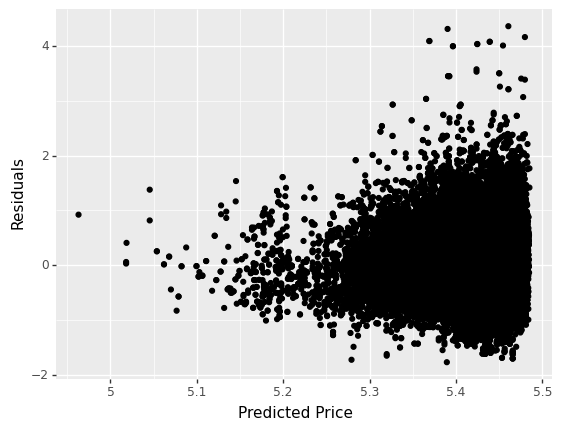

<ggplot: (391442035)>

In [11]:
model2_df = model2.fittedvalues.to_frame(name = 'Fitted')
model2_df['Residuals'] = model2.resid

(p9.ggplot(model2_df, p9.aes(x = 'Fitted', y = 'Residuals')) +
 p9.geom_point() +
 p9.xlab("Predicted Price") +
 p9.ylab("Residuals"))

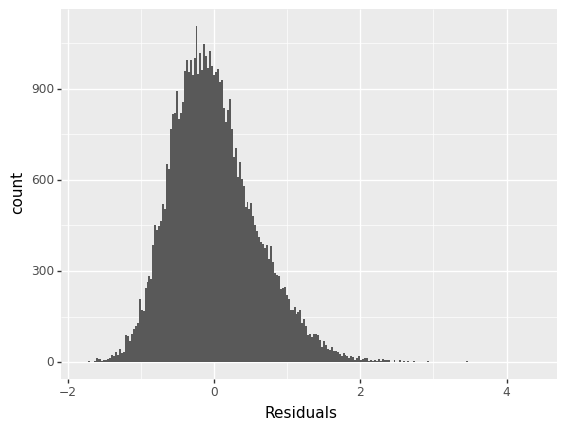

<ggplot: (391264642)>

In [12]:
(p9.ggplot(model2_df, p9.aes(x = 'Residuals')) +
   p9.geom_histogram(bins = 230) +
   p9.xlab("Residuals"))

\textcolor{blue}{The $r^2$ is now 0.7\%--slightly higher but still not very good. The residuals still look wedge-shaped, although slightly less so. The biggest change is in the residuals, which are still not entirely symmetric but are much closer to meeting the assumption.}

## Significant Predictors

### p-values from the $t$-distribution

5. The $r^2$ for both models is fairly low, but let's practice finding significant features in the model. Re-examine the `.()summary` output for your second model (with `logRealSum` as the response). Can you find the p-value for the coefficient on `dist`? Would you reject or fail to reject a formal hypothesis test investigating whether or not the coefficient is zero?

In [13]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logRealSum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     357.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.63e-79
Time:                        14:22:38   Log-Likelihood:                -46483.
No. Observations:               51707   AIC:                         9.297e+04
Df Residuals:                   51705   BIC:                         9.299e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4854      0.004   1258.880      0.000       5.477       5.494
dist          -0.0207      0.001    -18.914      0.000      -0.023      -0.019
==============================================================================
Omnibus:                     4982.572   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8032.542
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       4.310   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\textcolor{blue}{The p-value is so small it is recorded as 0.000--we would reject the null hypothesis that the slope is 0.}

### p-values from Bootstrapping

The p-values calculated by `statsmodels` require assumptions about the distributions of the $\beta$'s--specifically, that the Central Limit Theorem kicks in and that the sampling distributions are normal/$t$-distributions. We can use a few other methods if we don't want to make those kinds of assumptions. 

The first of such methods is called "bootstrapping". Bootstrapping is a resampling method that was originally developed to find standard errors for hard to calculate statistics. The basic steps of bootstrapping are as follows:

* Randomly generate a sample of size $n$ from your original data. The data should be sampled WITH REPLACEMENT. 
* Calculate the statistic from the "new", resampled dataset.
* Record the statistic. 
* Repeat the first three steps a large number of times--the more times you repeat, the longer the computer will take, but for reasonably simple problems it should not be too much of a burden to repeat at least 5,000 times. 

6. Randomly generate a sample of 51707 observations from the AirBnB dataset WITH REPLACEMENT. `pandas` has a special method, [`DataFrame.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html), for sampling from a dataframe--I suggest you use it! Save the resampled data as a new object, `tempdata`.

In [14]:
tempdata = AirBnB_prices.sample(n = 51707, replace=True)

7. Refit the simple linear regression model predicting `logRealSum` using `tempdata`. Examine the coefficients. 

In [15]:
Xtemp = tempdata["dist"]
Xtemp = sm.add_constant(Xtemp)

Ytemp = tempdata["logRealSum"]

modeltemp = sm.OLS(Ytemp, Xtemp).fit()
modeltemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logRealSum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     366.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.36e-81
Time:                        14:22:38   Log-Likelihood:                -46376.
No. Observations:               51707   AIC:                         9.276e+04
Df Residuals:                   51705   BIC:                         9.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4884      0.004   1256.813      0.000       5.480       5.497
dist          -0.0210      0.001    -19.137      0.000      -0.023      -0.019
==============================================================================
Omnibus:                     5252.641   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8967.260
Skew:                           0.718   Prob(JB):                         0.00
Kurtosis:                       4.449   Cond. No.                         6.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The saving part is a little tricky with `statsmodels`-we have to unpack our model to find the coefficients somewhere in it. 

8. First, pull out `params` from your model fit with the temporary dataset. Which one is the slope, and which is the intercept?


In [16]:
modeltemp.params

const    5.488376
dist    -0.020991
dtype: float64

\textcolor{blue}{The first row,} `const`\textcolor{blue}{, is the intercept, and the second is the slope. }

9. Use the square brackets to pull out the slope by itself. Save it as a new object, `tempslope`. Now you could refer to it later!

In [17]:
tempslope = modeltemp.params[1]

10. Rather than repeat all this manually 5,000 times, let's set up a loop to do it for us. Create an empty list, `tempslope`, and program the loop to resample data, calculate the slope, and append the value to the list. Run the loop 5,000 times. 

In [18]:
tempslope = []

for i in range(5000):
    tempdata = AirBnB_prices.sample(n = 51707, replace=True)
    
    Xtemp = tempdata["dist"]
    Xtemp = sm.add_constant(Xtemp)
    
    Ytemp = tempdata["logRealSum"]
    
    modeltemp = sm.OLS(Ytemp, Xtemp).fit()
    tempslope.append(modeltemp.params[1])

11. Create a histogram of the "tempslopes" (to use `plotnine`, you may have to convert the list to a dataframe first). Based on the histogram, would you conclude that 0 is a reasonable value for the slope on `dist`?

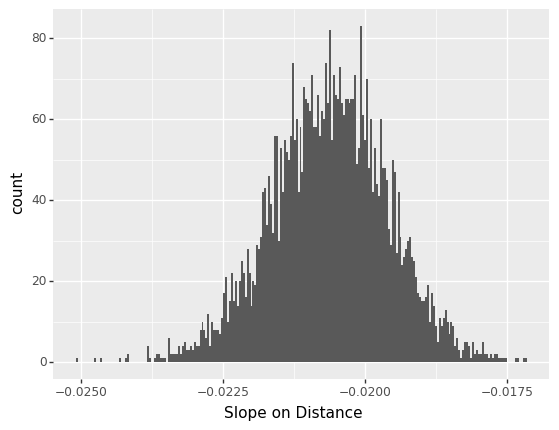

<ggplot: (391415366)>

In [19]:
tempslope_df = pd.DataFrame(tempslope, columns = ['tempslope'])

(p9.ggplot(tempslope_df, p9.aes(x = 'tempslope')) +
   p9.geom_histogram(bins = 230) +
   p9.xlab("Slope on Distance"))

We typically don't calculate p-values for bootstrapped estimates. Instead, we create confidence intervals by taking the "middle" of the distribution--e.g., for a 95\% confidence interval, we give the boundaries of the middle 95\% of the estimates. We find these boundaries by taking the quantiles of the distribution. For example, see the code for a 95% interval below. 

In [20]:
print(tempslope_df.quantile(0.025))
print(tempslope_df.quantile(0.975))

tempslope   -0.022696
Name: 0.025, dtype: float64
tempslope   -0.018624
Name: 0.975, dtype: float64


So, the 95\% confidence interval for the slope on `dist` is -0.0227 to -0.0186. This interval does not include 0, so 0 should not be considered a reasonable value-therefore, `dist` is a significant predictor!

12. Adapt the code to output a 99\% confidence interval. Does your conclusion change?

In [21]:
print(tempslope_df.quantile(0.005))
print(tempslope_df.quantile(0.995))

tempslope   -0.023434
Name: 0.005, dtype: float64
tempslope   -0.017947
Name: 0.995, dtype: float64


\textcolor{blue}{Zero is still not included in the interval, so no, the conclusions do not change.}

### p-values from Permutation Testing

Another method is called permutation testing. Permutation testing is another resampling method that assumes that if there is no effect from the explanatory variable, the values of the $X$ and $Y$ variables could theoretically be swapped. The basic steps of a permutation test are as follows:

* Randomly pair the values of $Y$ with values of $X$. 
* Calculate the statistic from the "new" dataset.
* Record the statistic. 
* Repeat the first three steps a large number of times--again, 5,000 should not be an issue.

13. Randomly pair the values of `logRealSum` with `dist` by generating a random sample of 51707 observations from `logRealSum` WITHOUT REPLACEMENT. Save the new $Y$ pairs in an object called `tempLogRealSum`.

In [22]:
tempLogRealSum = AirBnB_prices['logRealSum'].sample(n = 51707, replace=True)
tempLogRealSum

28071    5.157932
45237    5.324325
43628    5.330003
9495     5.310646
28264    4.755170
           ...   
33761    5.097274
31819    5.183317
27083    5.500571
3056     4.935898
13466    4.883313
Name: logRealSum, Length: 51707, dtype: float64

14. Refit the model predicting `tempLogRealSum` (in list form) from `dist`. Examine the statistics.

In [23]:
Xpermute = AirBnB_prices["dist"]
Xpermute = sm.add_constant(Xpermute)

modelpermute = sm.OLS(list(tempLogRealSum), Xpermute).fit()
modelpermute.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01161
Date:                Tue, 11 Apr 2023   Prob (F-statistic):              0.914
Time:                        14:23:02   Log-Likelihood:                -47001.
No. Observations:               51707   AIC:                         9.401e+04
Df Residuals:                   51705   BIC:                         9.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4229      0.004   1232.141      0.000       5.414       5.432
dist          -0.0001      0.001     -0.108      0.914      -0.002       0.002
==============================================================================
Omnibus:                     4916.101   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7770.333
Skew:                           0.710   Prob(JB):                         0.00
Kurtosis:                       4.262   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

15. Let's write another loop. Create an empty list, `permuteslope`, and program the loop to resample the `logRealSum` values, calculate the slope, and append the value to the list. Run the loop 5,000 times. 

In [24]:
permuteslope = []

for i in range(5000):
    tempLogRealSum = AirBnB_prices['logRealSum'].sample(n = 51707, replace=False)

    modelpermute = sm.OLS(list(tempLogRealSum), Xpermute).fit()
    
    permuteslope.append(modelpermute.params[1])    

16. In a permutation test we have to find the original value of the statistic and then count the values from the models fit with resampled data to see how many are as or more extreme than the original value. Finally, to convert to a probability (p-value!), we divide by the number of resamplings. Write a line of code to calculate the p-value--does it change your conclusions about `dist` and `logRealSum`?

In [33]:
import numpy as np
sum(np.absolute(permuteslope) > np.absolute(-0.0207))/5000

0.0

\textcolor{blue}{The approximate p-value is zero, which is less than any reasonable significance level, so we reject the null hypothesis and conclude that} `dist` \textcolor{blue}{is a significant predictor of} `logRealSum` \textcolor{blue}{.}

## Exploratory Data Analysis for Multiple Linear Regression 

`dist` may be significant, but it doesn't predict `logRealSum` very well. Let's try adding more variables! First, take a good look at `AirBnB_prices`. Some variables are likely collinear--can you identify any pairs that might give you trouble later on? Don't forget to check out the documentation as it might give you some more insight.

In [30]:
AirBnB_prices.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,logRealSum
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,25854.000000,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,5.419519
std,14926.669521,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.596600
min,1.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,3.549024
25%,12927.500000,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,5.002282
50%,25854.000000,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,5.353483
75%,38780.500000,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,5.767365
max,51707.000000,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,9.827980


\textcolor{blue}{First, notice that } `attr_index` \textcolor{blue}{and} `attr_index_norm` \textcolor{blue}{and} `rest_index` \textcolor{blue}{and} `rest_index_norm` \textcolor{blue}{are likely correlated, since one is a normalized version of the other. Note also that } `room_type` \textcolor{blue}{,} `room_shared` \textcolor{blue}{, and} `room_private` \textcolor{blue}{also seem to contain the same types of information.} 

17. Now calculate the correlation matrix for the numeric variables (ignore indicators for now). Do you see any correlations (other than the 1's along the diagonal) that are very high? This is another indication of collinearity. 

In [31]:
AirBnB_prices[['logRealSum', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 
              'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 
              'rest_index_norm', 'lng', 'lat']].corr()

,logRealSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
logRealSum,1.000000,0.317951,0.000302,-0.013133,0.267104,-0.082892,-0.107958,0.322130,0.463870,0.273031,0.291385,-0.348736,0.350186
person_capacity,0.317951,1.000000,0.003256,0.005181,0.560627,-0.128488,-0.037267,0.028394,-0.050487,0.037330,0.038059,0.146848,-0.168265
cleanliness_rating,0.000302,0.003256,1.000000,0.714045,0.033489,-0.030202,0.010441,-0.025322,-0.075372,-0.031929,-0.005995,0.120379,-0.092502
guest_satisfaction_overall,-0.013133,0.005181,0.714045,1.000000,0.047573,-0.004178,0.029788,-0.050624,-0.074146,-0.069319,-0.008765,0.156079,-0.033957
bedrooms,0.267104,0.560627,0.033489,0.047573,1.000000,-0.006262,0.044431,-0.011735,-0.063773,-0.014047,-0.057726,0.013688,-0.104694
dist,-0.082892,-0.128488,-0.030202,-0.004178,-0.006262,1.000000,0.558064,-0.363088,-0.242862,-0.346653,-0.467791,-0.147424,0.405878
metro_dist,-0.107958,-0.037267,0.010441,0.029788,0.044431,0.558064,1.000000,-0.168010,-0.219587,-0.138876,-0.259654,-0.069506,0.086424
attr_index,0.322130,0.028394,-0.025322,-0.050624,-0.011735,-0.363088,-0.168010,1.000000,0.714847,0.850229,0.544403,-0.126942,-0.052438
attr_index_norm,0.463870,-0.050487,-0.075372,-0.074146,-0.063773,-0.242862,-0.219587,0.714847,1.000000,0.527623,0.472143,-0.221591,0.435237
rest_index,0.273031,0.037330,-0.031929,-0.069319,-0.014047,-0.346653,-0.138876,0.850229,0.527623,1.000000,0.617970,-0.176704,-0.113163


\textcolor{blue}{The following pairs might be considered collinear, although none of the correlations are particularly high:}

* `guest_satisfaction_overall`\textcolor{blue}{,} `cleanliness_rating`
* `attr_index`\textcolor{blue}{,} `attr_index_norm` \textcolor{blue}{(as suspected)}

## Categorical Variables

18. Now let's reconsider the categorical variables. First, from the documentation, identify which variables should be categorical (regardless of how they have been stored). 

\textcolor{blue}{The variables that are categorical are} `room_type`\textcolor{blue}{, the type of the accommodation ("Private room", "Entire home/apt", "Shared room"), } `room_shared`\textcolor{blue}{, a dummy variable for shared rooms, } `room_private`\textcolor{blue}{, a dummy variable for private rooms, } `host_is_superhost`\textcolor{blue}{, a dummy variable for superhost status, } `multi`\textcolor{blue}{, a dummy variable if the listing belongs to hosts with 2-4 offers, } `biz` \textcolor{blue}{, a dummy variable if the listing belongs to hosts with more than 4 offers, } `city`\textcolor{blue}{, the European city (Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, and Vienna), and } `dayType`\textcolor{blue}{, whether the day is a weekday or a weekend. Note that "dummy" variable is another way of saying indicator variable. }


19. Many of these variables are already stored as numbers (0 and 1). Investigate the dataset to see which you can already use. 

`room_shared` \textcolor{blue}{,} `room_private` \textcolor{blue}{,} `host_is_superhost` \textcolor{blue}{,} `multi`\textcolor{blue}{, and } `biz` \textcolor{blue}{are already stored as 0's and 1's.} `room_type` \textcolor{blue}{,} `city` \textcolor{blue}{, and} `dayType` \textcolor{blue}{are not, and need to be converted. }

20. How many indicator variables does `room_type` need? How many indicator variables does `city` need?

`room_type` \textcolor{blue}{needs two (three room types minus one), and } `city` \textcolor{blue}{needs nine (ten cities minus one)}.

21. The method for converting these categorical variables into a series of indicator variables is called "one-hot encoding", and there are methods built into Python that can handle it neatly! Let's use the methods from `pandas` since we already have it installed. The specific function is `get_dummies()`. Run the code below, and see if you can identify which columns were added to the dataframe. 

In [32]:
one_hot_encoded_data = pd.get_dummies(AirBnB_prices, columns = ['room_type'])
print(one_hot_encoded_data)

       Unnamed: 0      realSum  room_shared  room_private  person_capacity  \
0               1   319.640053        False          True                2   
1               2   347.995219        False          True                2   
2               3   482.975183        False          True                4   
3               4   485.552926        False          True                2   
4               5  2771.541724        False         False                4   
...           ...          ...          ...           ...              ...   
51702       51703   715.938574        False         False                6   
51703       51704   304.793960        False         False                2   
51704       51705   637.168969        False         False                2   
51705       51706   301.054157        False          True                2   
51706       51707   133.230489        False          True                4   

       host_is_superhost  multi  biz  cleanliness_rating  \
0  

`room_type` was perhaps a bad example--if you look closely, you should see that there are already dummy variables for `room_type`: `room_shared` and `room_private`. WARNING! If you put two columns that have identical information into a linear regression model, the math will not work. Be careful when examining the documentation to see that you do not put shared information into your model. As it turns out, we still do need to add *numeric* dummy variables in some way--True/False will not work. Run the following code to make sure everything in the dataframe is numeric. 

In [33]:
AirBnB_prices['room_shared'] = AirBnB_prices['room_shared'].astype('int')
AirBnB_prices['room_private'] = AirBnB_prices['room_private'].astype('int')
AirBnB_prices['host_is_superhost'] = AirBnB_prices['host_is_superhost'].astype('int')

22. Add indicator variables for  `city` and `dayType`. 

In [34]:
AirBnB_prices = pd.get_dummies(AirBnB_prices, columns = ['room_type', 'city', 'dayType'])
print(AirBnB_prices)

       Unnamed: 0      realSum  room_shared  room_private  person_capacity  \
0               1   319.640053            0             1                2   
1               2   347.995219            0             1                2   
2               3   482.975183            0             1                4   
3               4   485.552926            0             1                2   
4               5  2771.541724            0             0                4   
...           ...          ...          ...           ...              ...   
51702       51703   715.938574            0             0                6   
51703       51704   304.793960            0             0                2   
51704       51705   637.168969            0             0                2   
51705       51706   301.054157            0             1                2   
51706       51707   133.230489            0             1                4   

       host_is_superhost  multi  biz  cleanliness_rating  \
0  

## Multiple Linear Regression

23. Now let's try multiple linear regression. Fit a model predicting `realSum` with one of each variable--be careful to use only one set of the `attr` and `rest` variables. What is the adjusted $r^2$? Is this an improvement?

In [35]:
X3 = AirBnB_prices[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
                  'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 
                  'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lat', 'lng', 
                  'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 
                  'city_london', 'city_paris', 'city_rome', 'city_vienna', 'dayType_weekends']]
X3 = sm.add_constant(X3)

model3 = sm.OLS(Y, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realSum   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     637.2
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:09:49   Log-Likelihood:            -3.6595e+05
No. Observations:               51707   AIC:                         7.320e+05
Df Residuals:                   51681   BIC:                         7.322e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -4376.4295   3139.563     -1.394      0.163   -1.05e+04    1777.145
room_shared                 -200.6815     15.203    -13.200      0.000    -230.479    -170.884
room_private                -115.9483      3.378    -34.329      0.000    -122.568    -109.328
person_capacity               24.0637      1.393     17.279      0.000      21.334      26.793
host_is_superhost             -1.6784      3.095     -0.542      0.588      -7.744       4.387
multi                         13.1147      3.252      4.032      0.000       6.740      19.489
biz                           35.6271      3.292     10.821      0.000      29.174      42.080
cleanliness_rating             6.7461      1.912      3.528      0.000       2.998      10.494
guest_satisfaction_overall     0.7143      0.208      3.431      0.001       0.306       1.122
bedrooms                      88.8234      2.523     35.205      0.000      83.878      93.769
dist                          -8.8932      0.931     -9.556      0.000     -10.717      -7.069
metro_dist                    -4.3466      1.989     -2.185      0.029      -8.246      -0.447
attr_index                     0.1577      0.011     14.059      0.000       0.136       0.180
rest_index                     0.0123      0.006      2.111      0.035       0.001       0.024
lat                          118.5040     60.129      1.971      0.049       0.651     236.357
lng                         -315.2883     31.927     -9.875      0.000    -377.866    -252.711
city_athens                 7156.1257   1096.166      6.528      0.000    5007.630    9304.621
city_barcelona               167.2820    657.985      0.254      0.799   -1122.375    1456.939
city_berlin                 2426.3266    271.440      8.939      0.000    1894.301    2958.352
city_budapest               4593.3038    560.213      8.199      0.000    3495.281    5691.326
city_lisbon                -3187.7443    899.838     -3.543      0.000   -4951.435   -1424.053
city_london                -1653.5434    163.329    -10.124      0.000   -1973.671   -1333.416
city_paris                  -595.4262    219.007     -2.719      0.007   -1024.682    -166.171
city_rome                   3200.3312    694.347      4.609      0.000    1839.405    4561.257
city_vienna                 3771.2761    461.576      8.170      0.000    2866.582    4675.970
dayType_weekends               6.0428      2.527      2.392      0.017       1.090      10.995
==============================================================================
Omnibus:                   134363.725   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4104396063.604
Skew:                          30.102   Prob(JB):                         0.00
Kurtosis:   

\textcolor{blue}{The adjusted $r^2$ is now 0.235, which is an improvement, although still not particularly high.}

24. Create the diagnostic plots. How do they look? Is the linear model appropriate?

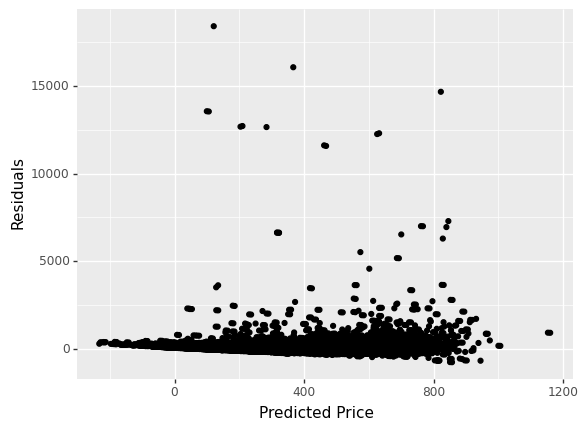

<ggplot: (368520334)>

In [36]:
model3_df = model3.fittedvalues.to_frame(name = 'Fitted')
model3_df['Residuals'] = model3.resid

(p9.ggplot(model3_df, p9.aes(x = 'Fitted', y = 'Residuals')) +
 p9.geom_point() +
 p9.xlab("Predicted Price") +
 p9.ylab("Residuals"))

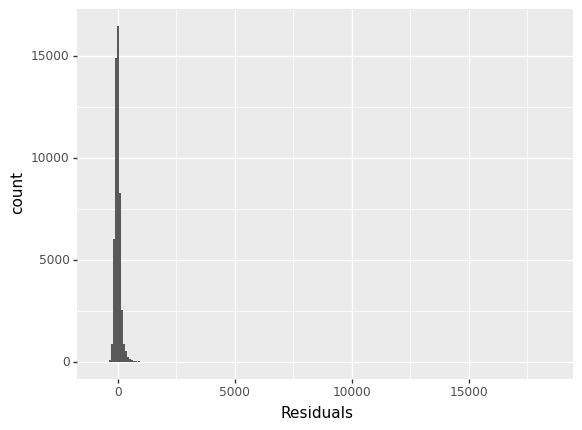

<ggplot: (368516226)>

In [37]:
(p9.ggplot(model3_df, p9.aes(x = 'Residuals')) +
   p9.geom_histogram(bins = 230) +
   p9.xlab("Residuals"))

\textcolor{blue}{The residuals plots are back to looking very bad. }

25. Don't forget that that the transformed response had much better diagnostic plots for the simple linear regression! Refit the data to predict `logRealSum`. Compare the adjusted $r^2$ (because we're in multiple linear regression now!!) to the simple linear regression model. Is there an improvement?

In [187]:
model4 = sm.OLS(Y2, X3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logRealSum   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     4017.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:35:53   Log-Likelihood:                -18754.
No. Observations:               51707   AIC:                         3.756e+04
Df Residuals:                   51681   BIC:                         3.779e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.0023      3.808      0.788      0.430      -4.461      10.466
room_shared                   -0.8214      0.018    -44.548      0.000      -0.858      -0.785
room_private                  -0.4155      0.004   -101.438      0.000      -0.424      -0.408
person_capacity                0.0894      0.002     52.952      0.000       0.086       0.093
host_is_superhost              0.0181      0.004      4.814      0.000       0.011       0.025
multi                          0.0491      0.004     12.452      0.000       0.041       0.057
biz                            0.1125      0.004     28.175      0.000       0.105       0.120
cleanliness_rating             0.0382      0.002     16.467      0.000       0.034       0.043
guest_satisfaction_overall     0.0009      0.000      3.515      0.000       0.000       0.001
bedrooms                       0.1488      0.003     48.610      0.000       0.143       0.155
dist                          -0.0269      0.001    -23.791      0.000      -0.029      -0.025
metro_dist                    -0.0082      0.002     -3.395      0.001      -0.013      -0.003
attr_index                     0.0004   1.36e-05     28.080      0.000       0.000       0.000
rest_index                   9.66e-05   7.09e-06     13.628      0.000    8.27e-05       0.000
lat                            0.1371      0.073      1.880      0.060      -0.006       0.280
lng                           -0.9776      0.039    -25.244      0.000      -1.053      -0.902
city_athens                   18.8388      1.330     14.170      0.000      16.233      21.445
city_barcelona                -1.8644      0.798     -2.336      0.019      -3.429      -0.300
city_berlin                    7.7010      0.329     23.391      0.000       7.056       8.346
city_budapest                 13.1610      0.679     19.369      0.000      11.829      14.493
city_lisbon                  -12.8334      1.091    -11.759      0.000     -14.973     -10.694
city_london                   -5.2537      0.198    -26.520      0.000      -5.642      -4.865
city_paris                    -2.5239      0.266     -9.501      0.000      -3.045      -2.003
city_rome                      7.6310      0.842      9.061      0.000       5.980       9.282
city_vienna                   10.8796      0.560     19.433      0.000       9.782      11.977
dayType_weekends               0.0291      0.003      9.483      0.000       0.023       0.035
==============================================================================
Omnibus:                    18276.474   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179225.886
Skew:                           1.419   Prob(JB):                         0.00
Kurtosis:   

\textcolor{blue}{Now the adjusted $r^2$ is 0.660! This is a substantial improvement, and in practice would be considered pretty good.}

\textcolor{red}{Note that there is a warning about a large condition number. I'm not sure precisely how it is related to VIF, but my guess is that there is a relationship. What I would do here is first check out the VIFs (which you can do with [VIF function from the statsmodels](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)) and then start eliminating variables from the model to see if I could address the issue. You might even get a higher adjusted $r^2$ due to the penalty from additional variables.}

26. Redo the diagnostic plots. Is a linear model appropriate?

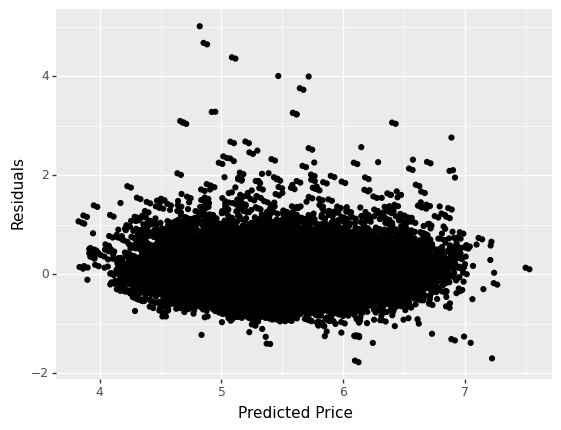

<ggplot: (367687897)>

In [188]:
model4_df = model4.fittedvalues.to_frame(name = 'Fitted')
model4_df['Residuals'] = model4.resid

(p9.ggplot(model4_df, p9.aes(x = 'Fitted', y = 'Residuals')) +
 p9.geom_point() +
 p9.xlab("Predicted Price") +
 p9.ylab("Residuals"))

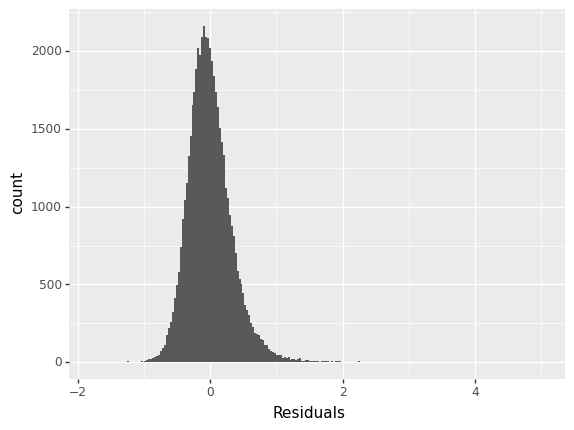

<ggplot: (367698429)>

In [189]:
(p9.ggplot(model4_df, p9.aes(x = 'Residuals')) +
   p9.geom_histogram(bins = 230) +
   p9.xlab("Residuals"))

In [ ]:
\textcolor{blue}{This is even better, the residuals look great! There would be no problem using this linear regression model based on the diagnostic plots.}

27. Now, look at the summary output. Are any of the variables not significant? Which might you drop?

## Logistic Regression

Let's switch to practicing logistic regression. Say we are interested in predicting whether or not a host is considered a superhost based on `multi`, `biz`, `cleanliness_rating`, and `guest_satisfaction_overall`. 

28. First, we need a categorical variable with two levels. View `host_is_superhost`--is this the case?


In [88]:
AirBnB_prices['host_is_superhost']

0        False
1        False
2        False
3         True
4         True
         ...  
51702    False
51703    False
51704    False
51705    False
51706     True
Name: host_is_superhost, Length: 51707, dtype: bool

\textcolor{blue}{Yes, it is a binary variable. }

29. Save `host_is_superhost` as a new response variable.

In [38]:
Y4 = AirBnB_prices['host_is_superhost']
Y4

0        0
1        0
2        0
3        1
4        1
        ..
51702    0
51703    0
51704    0
51705    0
51706    1
Name: host_is_superhost, Length: 51707, dtype: int64

30. Now, save the predictors of interest as new explanatory variables. Don't forget to add the constant!

In [39]:
X4 = AirBnB_prices[['multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall']]
X4 = sm.add_constant(X4)

31. Finally, fit the model. You can do this with `statmodels`, you just need `.Logit` instead of `.OLS`.

In [40]:
model4 = sm.Logit(Y4, X4).fit()

Optimization terminated successfully.
         Current function value: 0.483455
         Iterations 7


32. Investigate the summary. Which variables appear to be important?

In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      host_is_superhost   No. Observations:                51707
Model:                          Logit   Df Residuals:                    51702
Method:                           MLE   Df Model:                            4
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                  0.1499
Time:                        08:17:00   Log-Likelihood:                -24998.
converged:                       True   LL-Null:                       -29407.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -21.2589      0.296    -71.752      0.000     -21.840     -20.678
multi                          0.4431      0.026     17.030      0.000       0.392       0.494
biz                            0.0052      0.027      0.190      0.849      -0.049       0.059
cleanliness_rating             0.8623      0.026     32.629      0.000       0.810       0.914
guest_satisfaction_overall     0.1237      0.003     40.331      0.000       0.118       0.130
==============================================================================================
"""

\textcolor{blue}{All variables except } `biz` \textcolor{blue}{have p-values less than 0, so they are all significant predictors of whether the host is a superhost.}